In [1]:

import os 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab\Code\distinguish_pac')
import module_pac_functions as pacf

In [2]:
# Set directory in which the data structure can be found
os.chdir(r'C:\Users\jaapv\Desktop\master\VoytekLab')

# data
datastruct = np.load('datastruct.npy',  allow_pickle=True)

# dataframes
features_df = pd.read_csv('features_df.csv', sep=',')
burst_dataframe = pd.read_csv('burst_dataframe.csv', sep=',')

In [3]:
np.shape(datastruct)

(4, 128, 30, 20000)

In [4]:
end_sample

NameError: name 'end_sample' is not defined

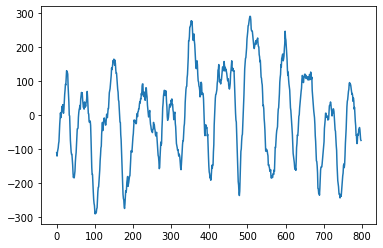

In [38]:
plt.plot(data - np.mean(data))

17.53407195750813
2.0000000000000004


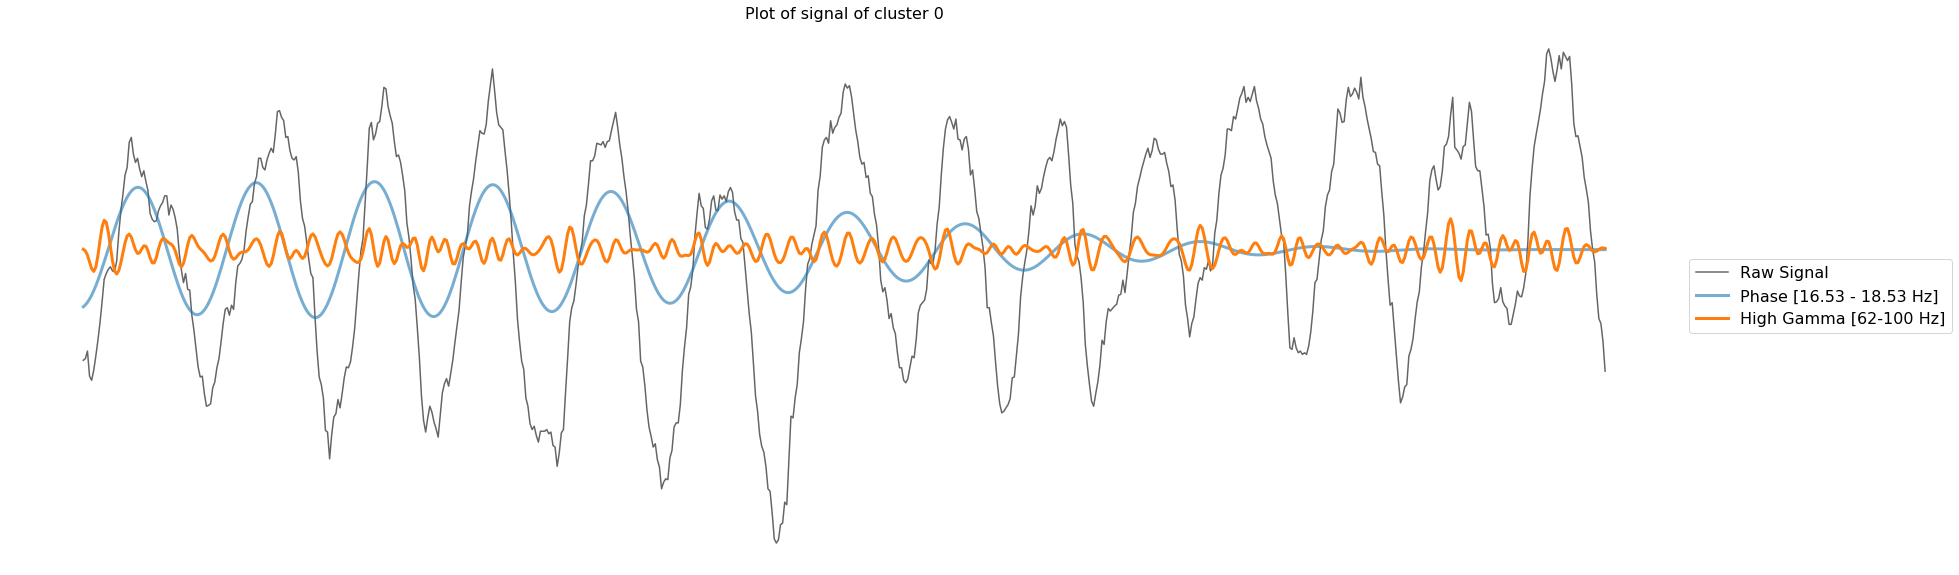

20.222871281775067
5.749415763647312


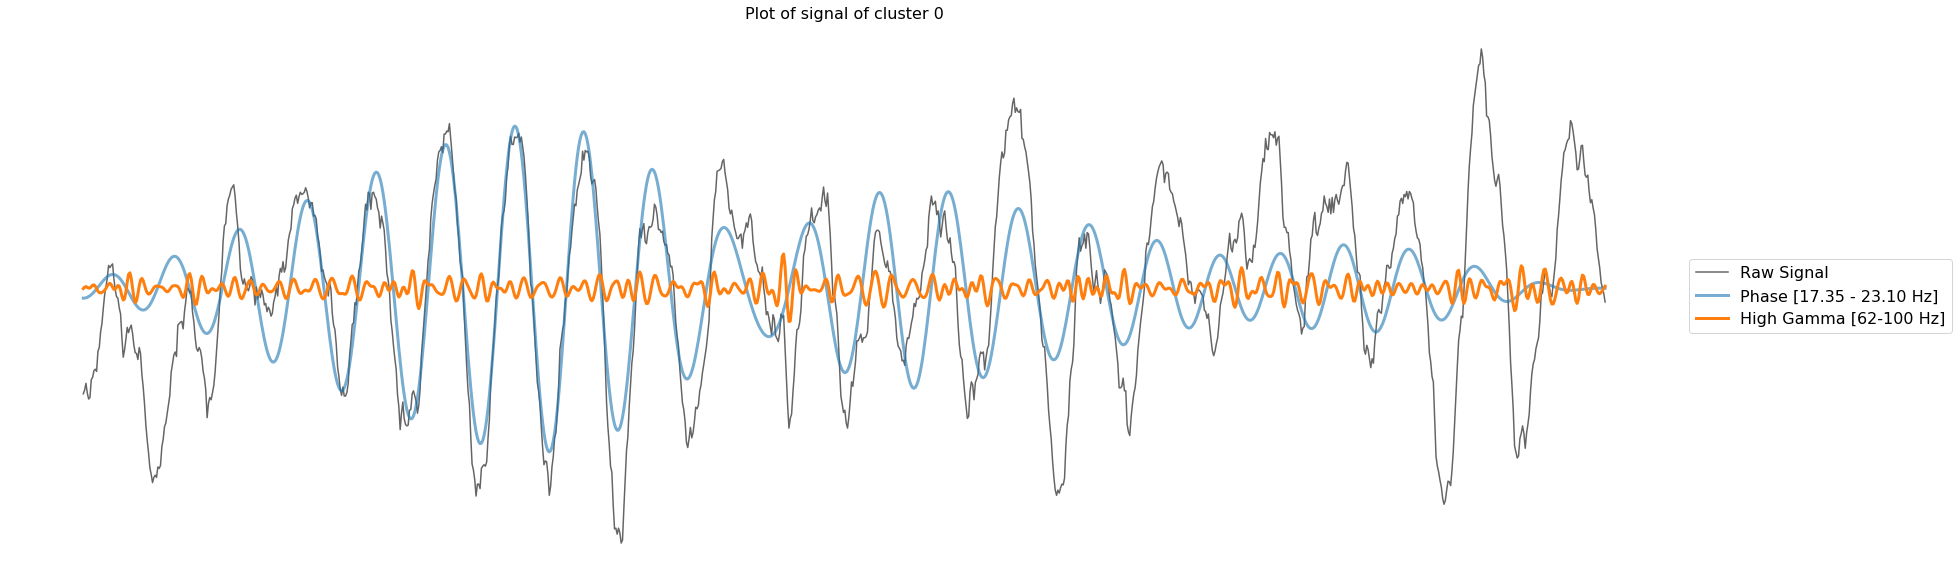

18.761216599530663
2.0589219160340573


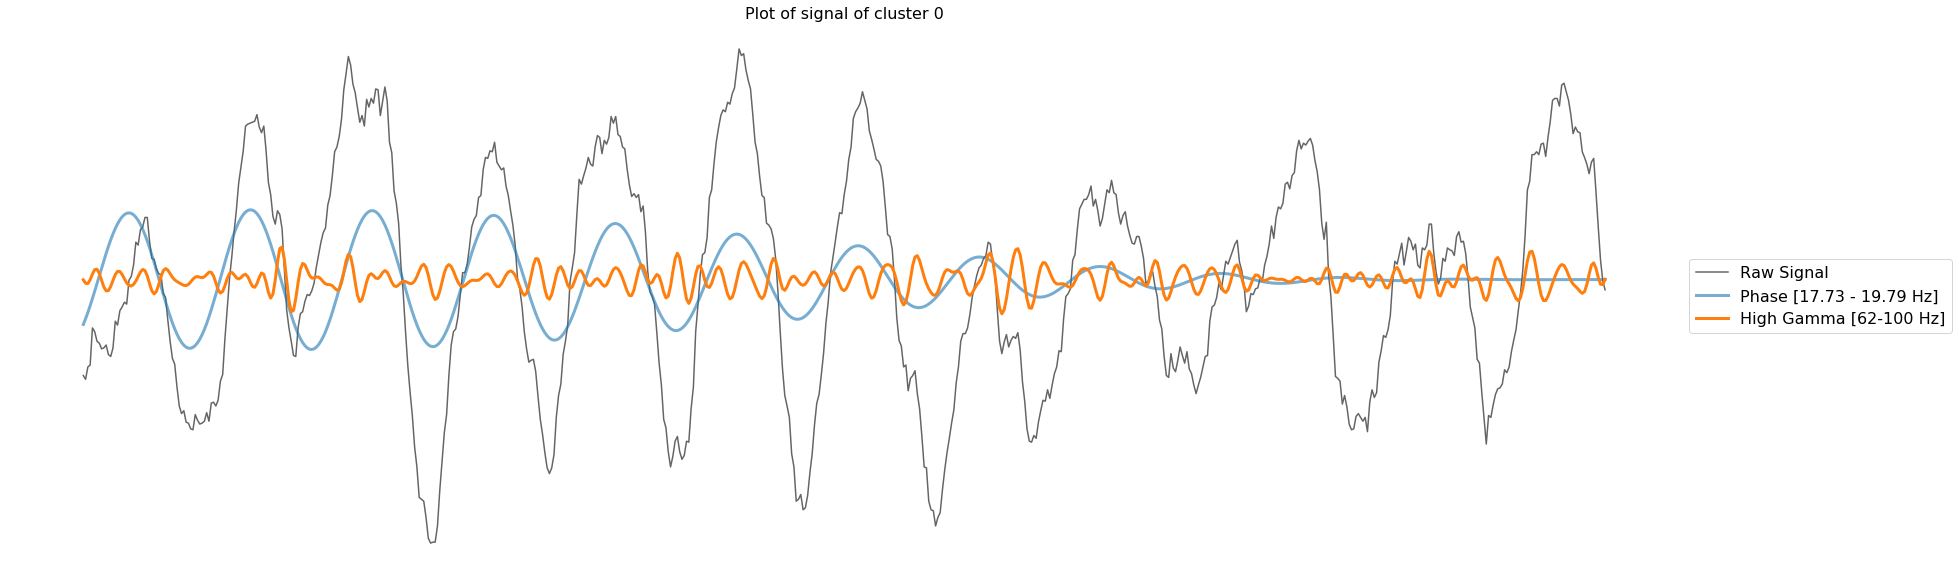

17.830736377054738
5.129217562654965


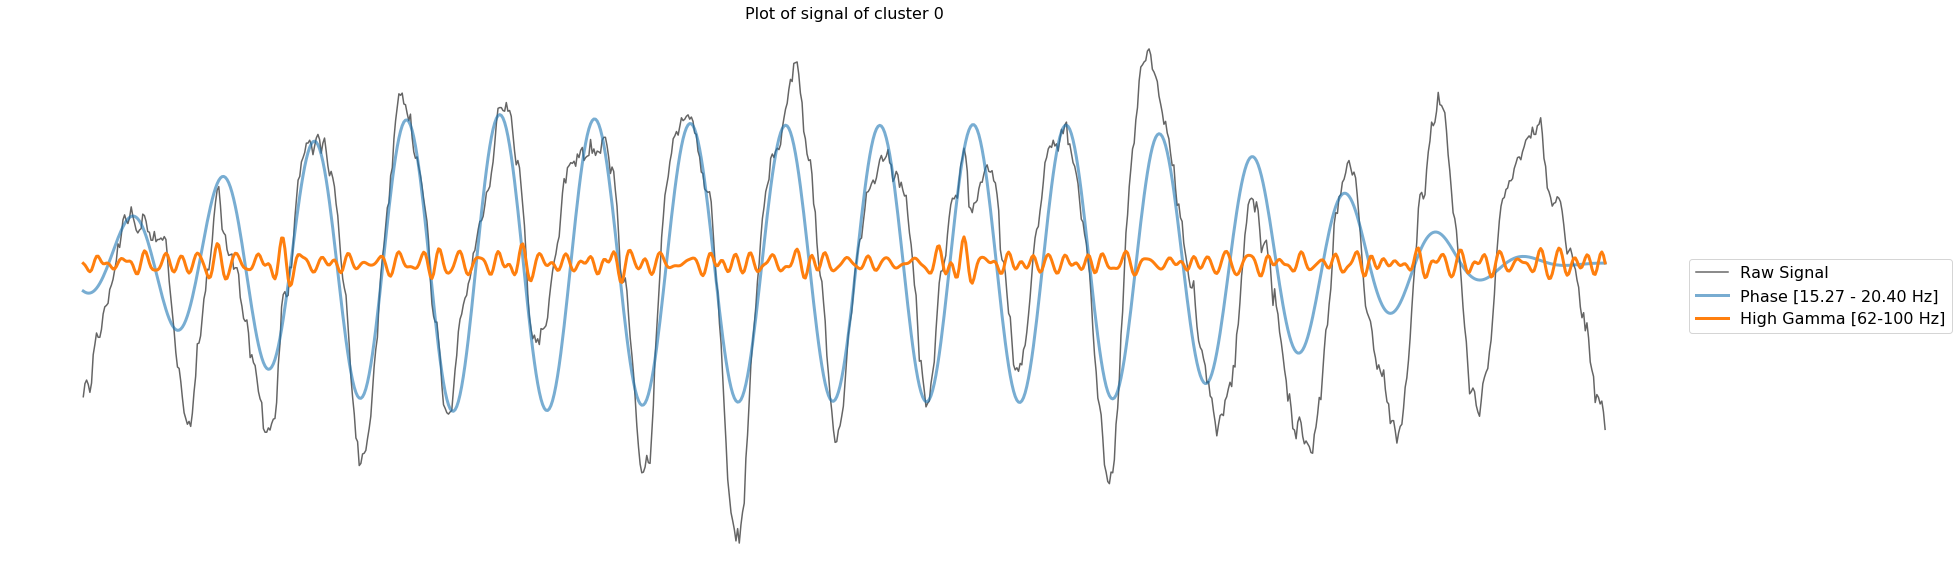

17.917126214457568
2.0000000000000004


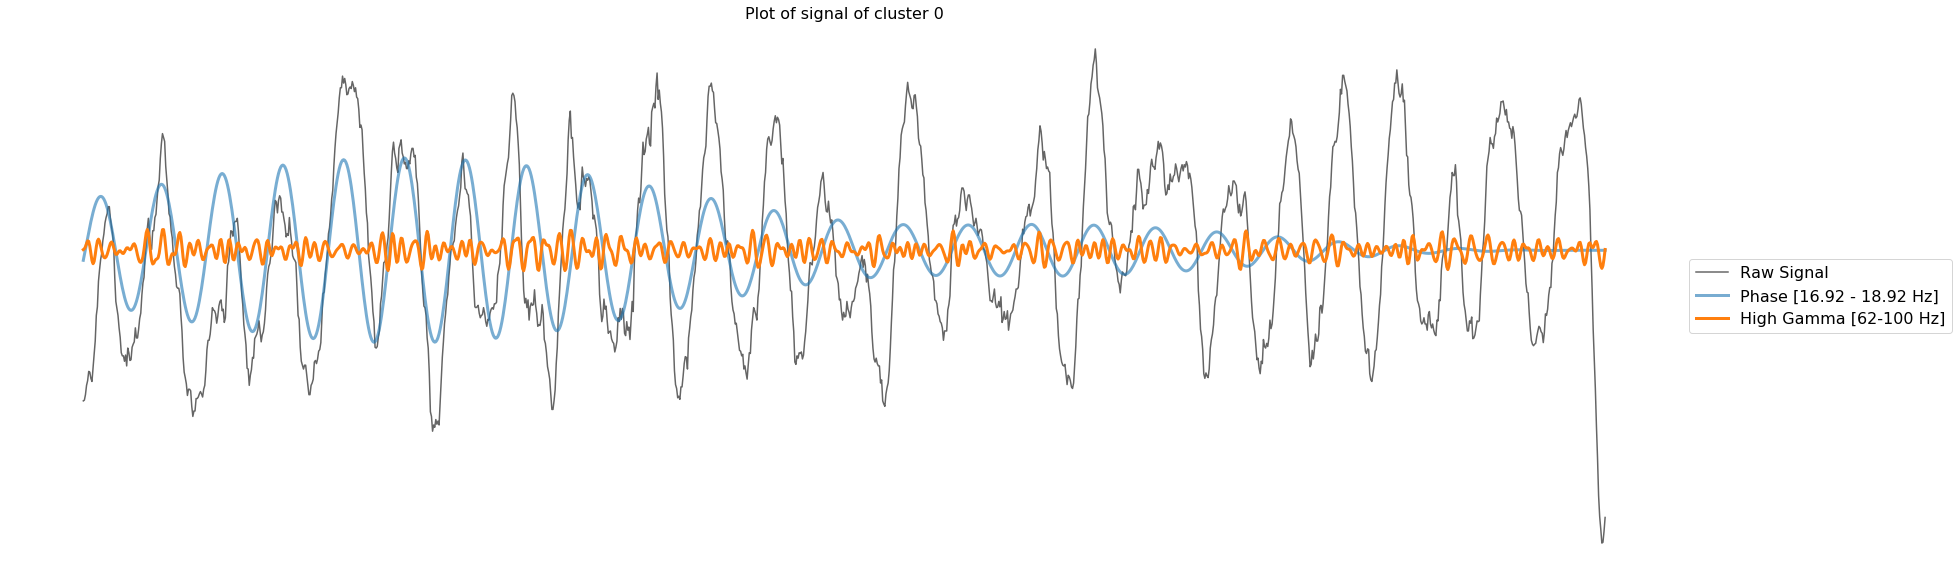

19.16095667708952
2.6356155939003587


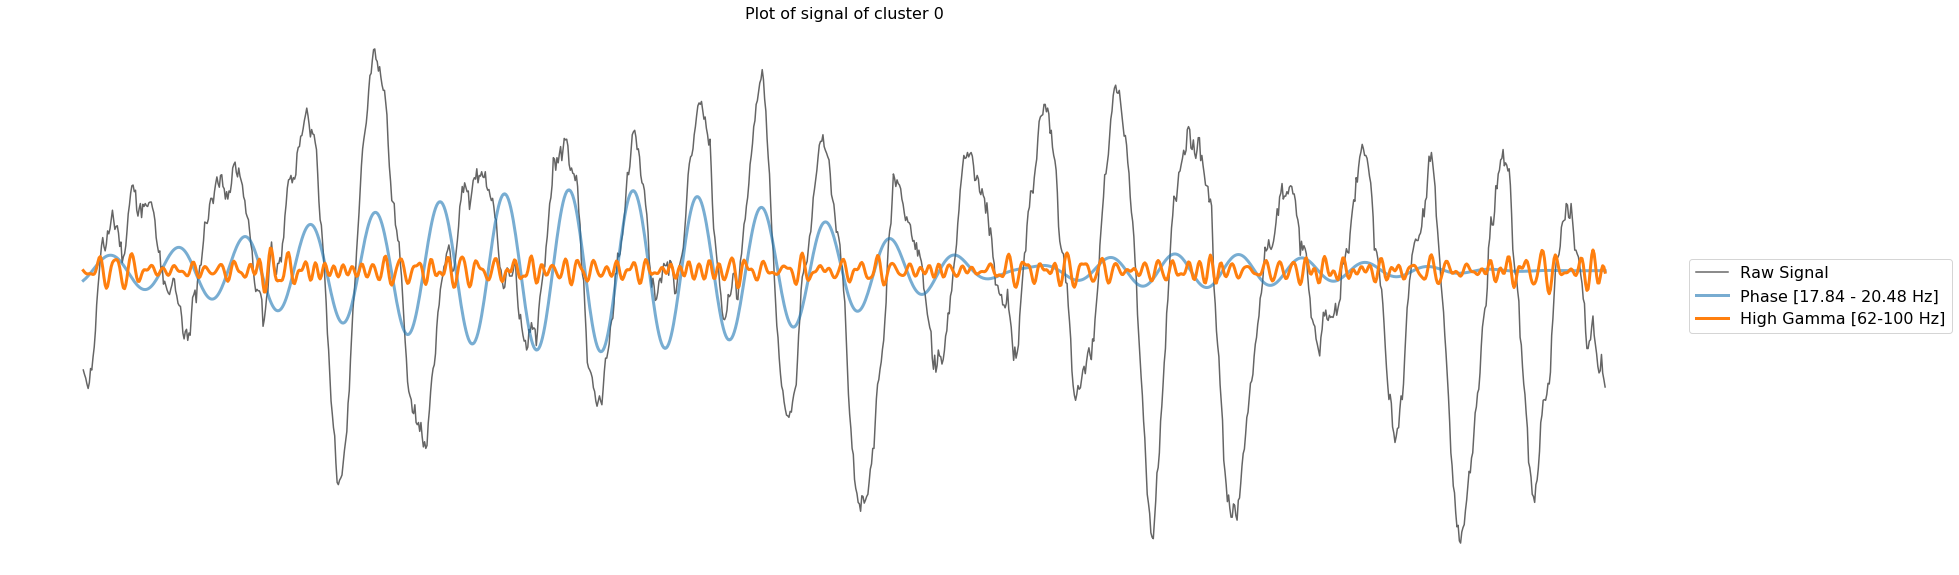

18.623750143015148
2.0000000000000004


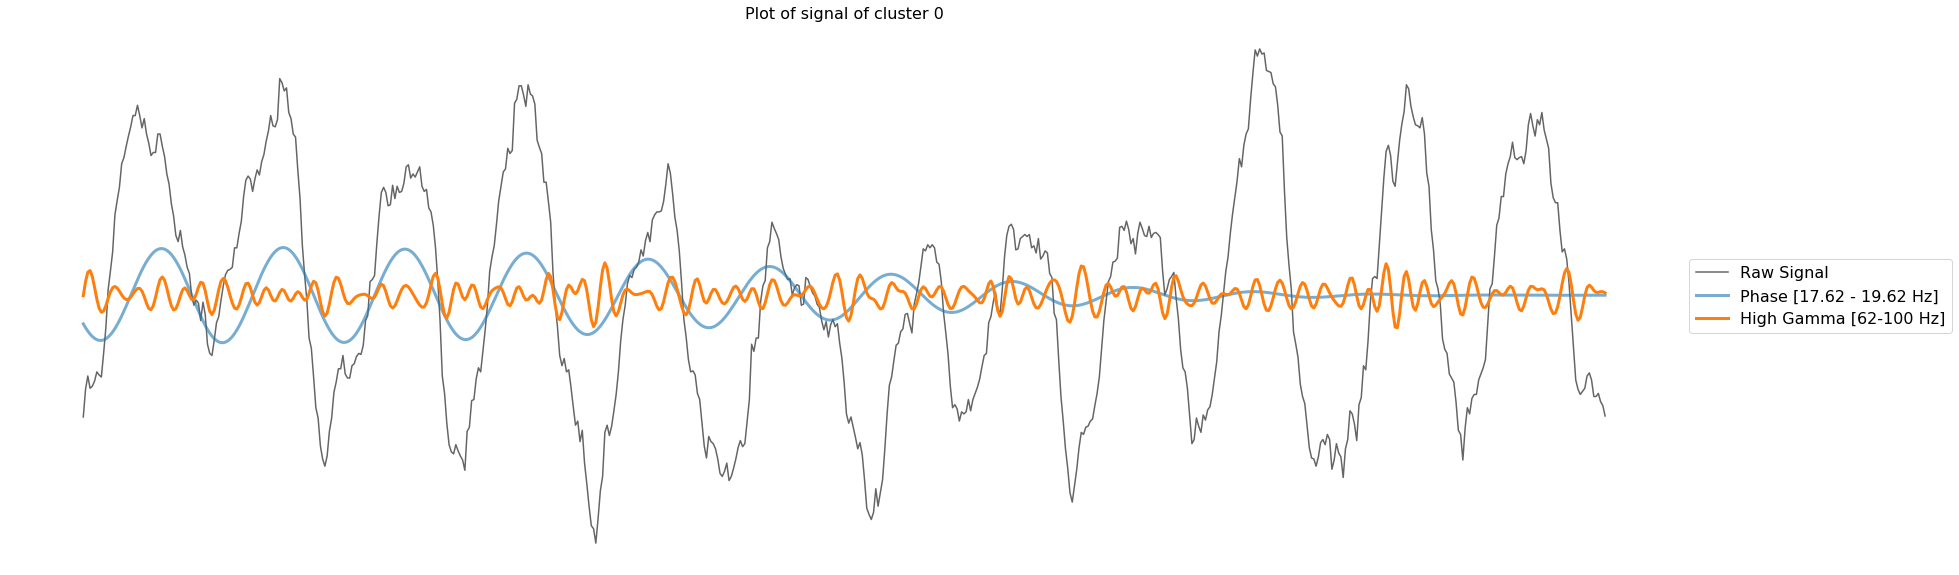

18.428387730617928
2.0000000000000004


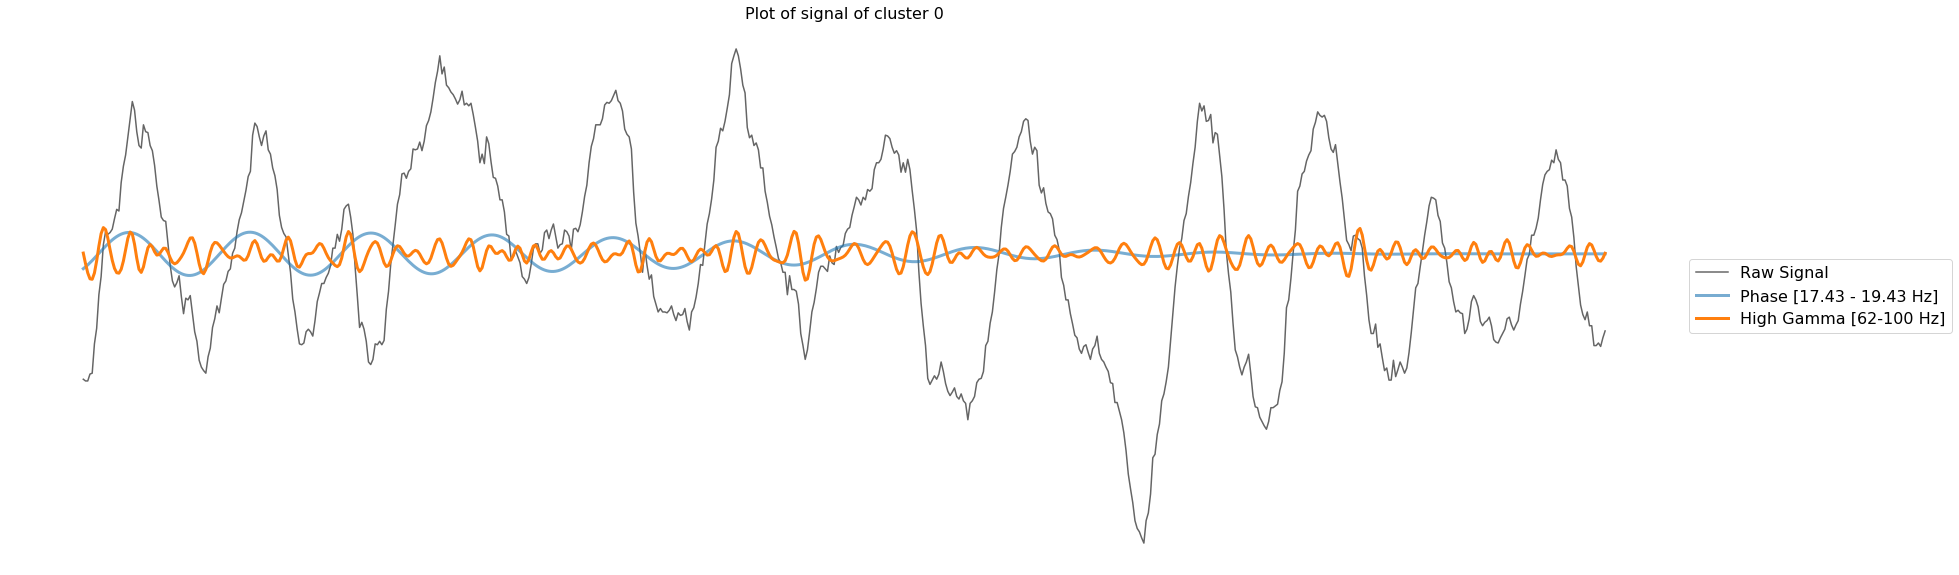

19.305045999799926
3.707374466325743


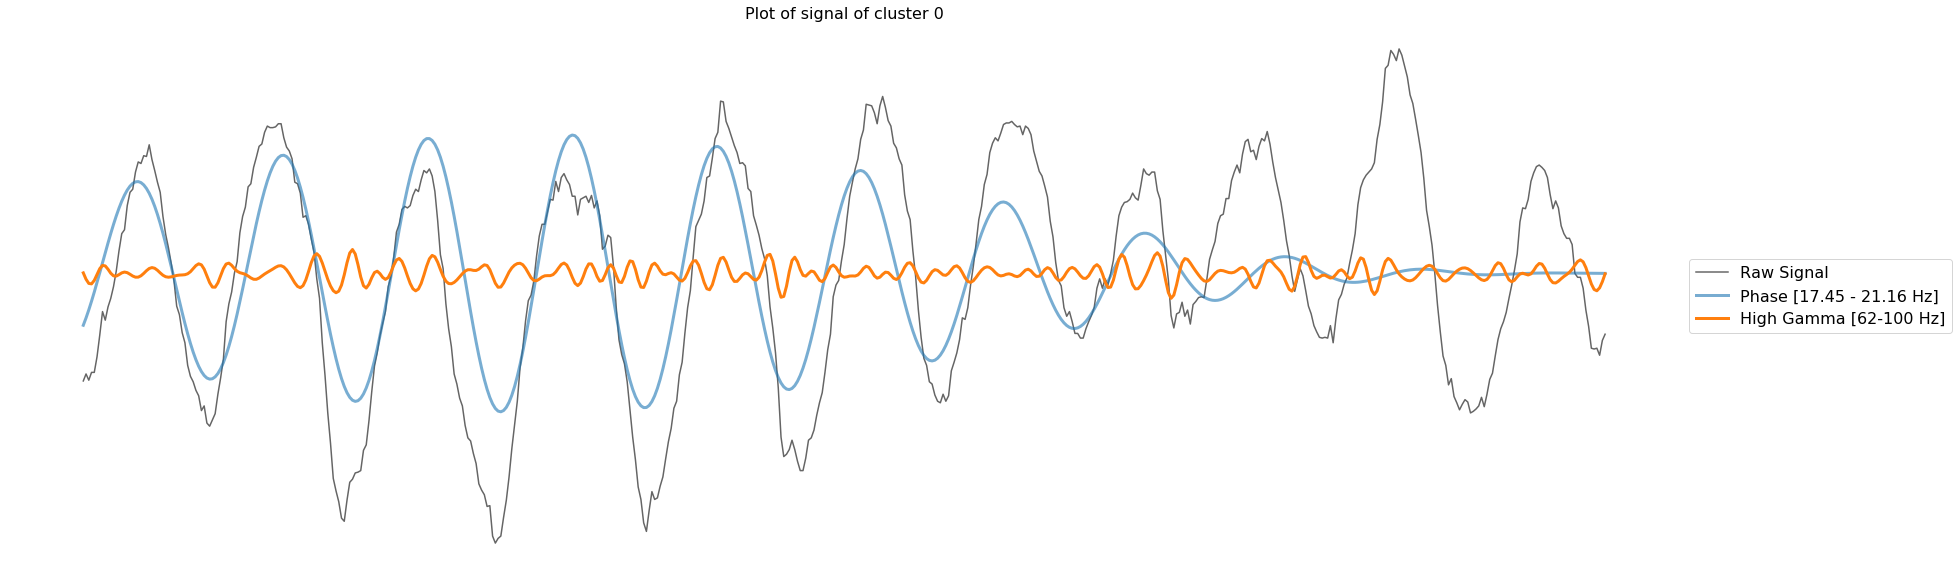

19.58867059398208
2.0000000000000004


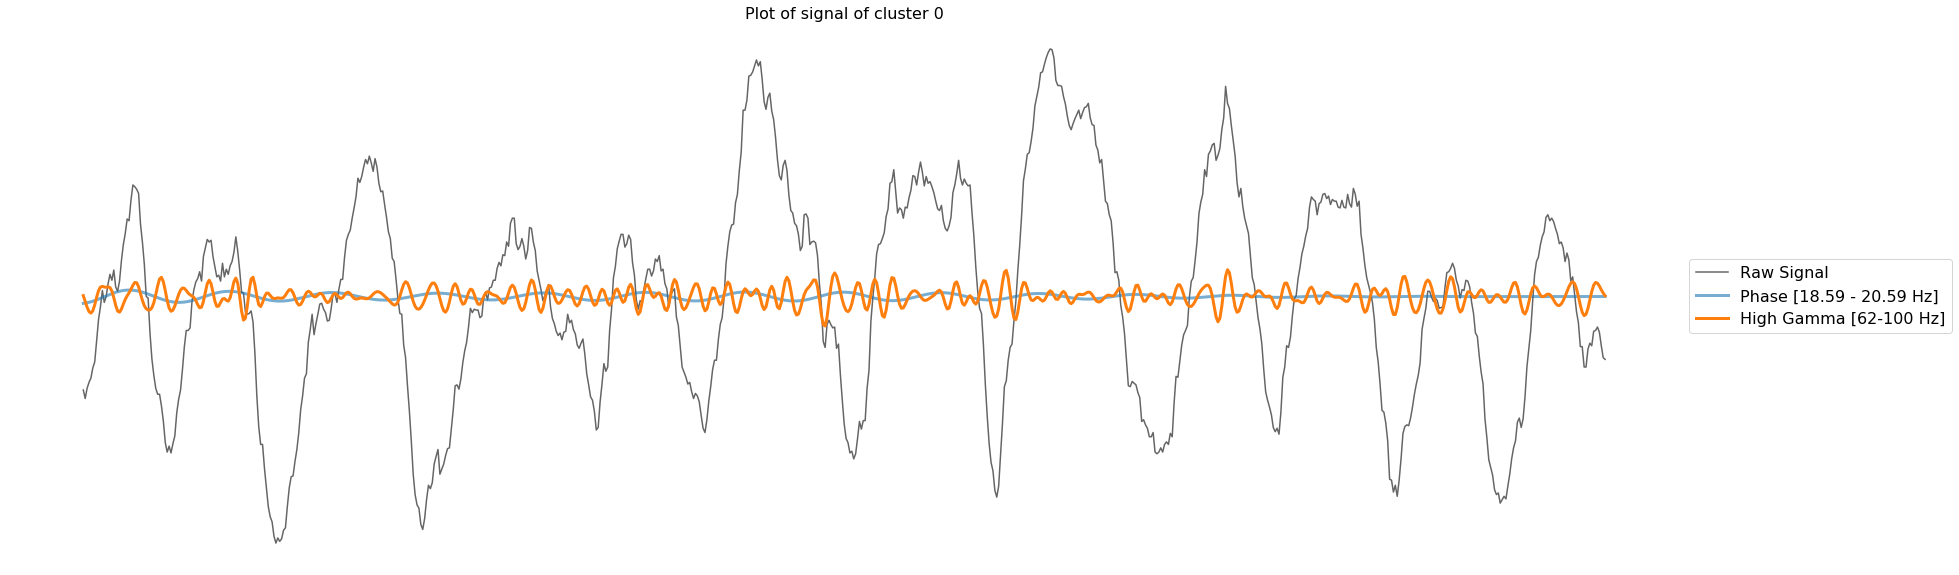

19.439501927502608
3.6381827299874434


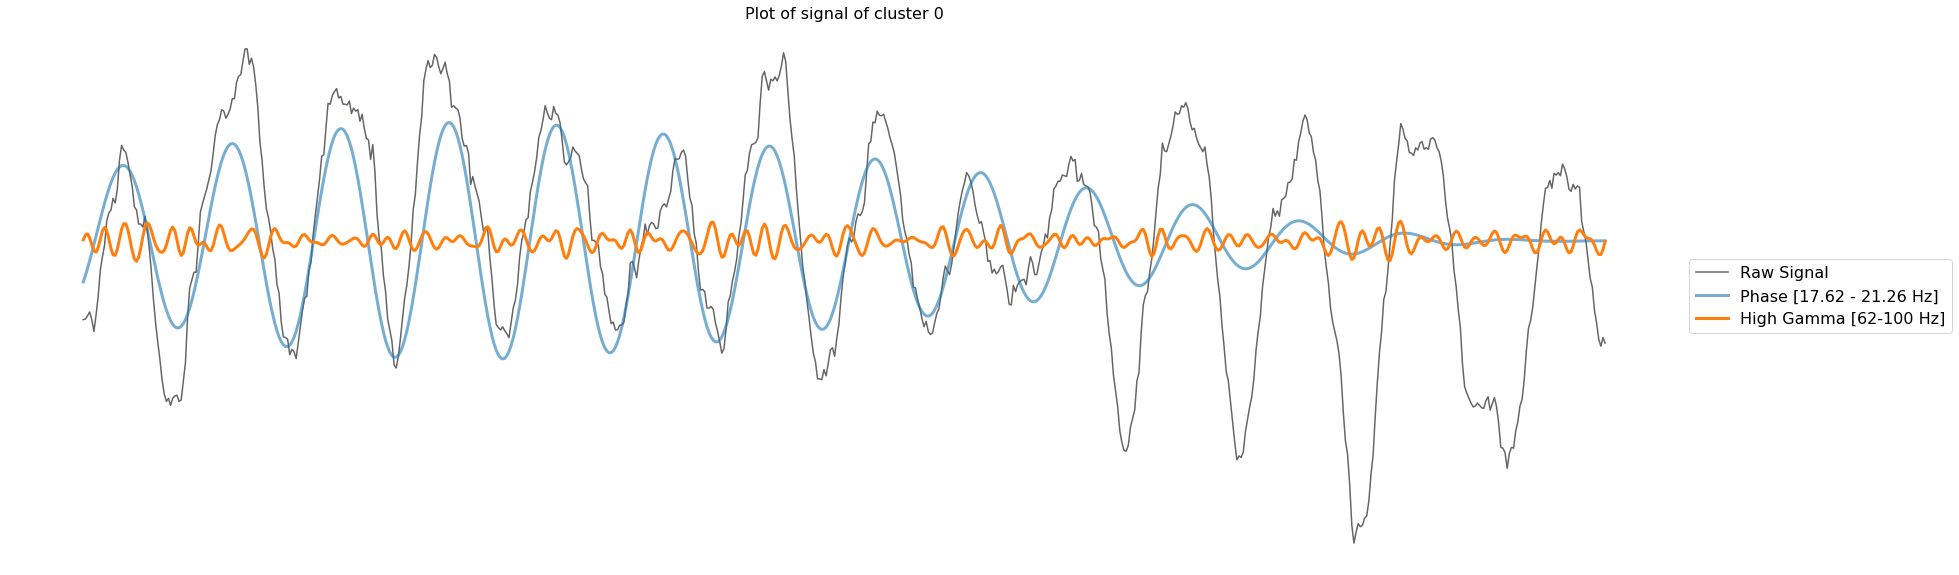

16.349463937721126
2.8786171523135864


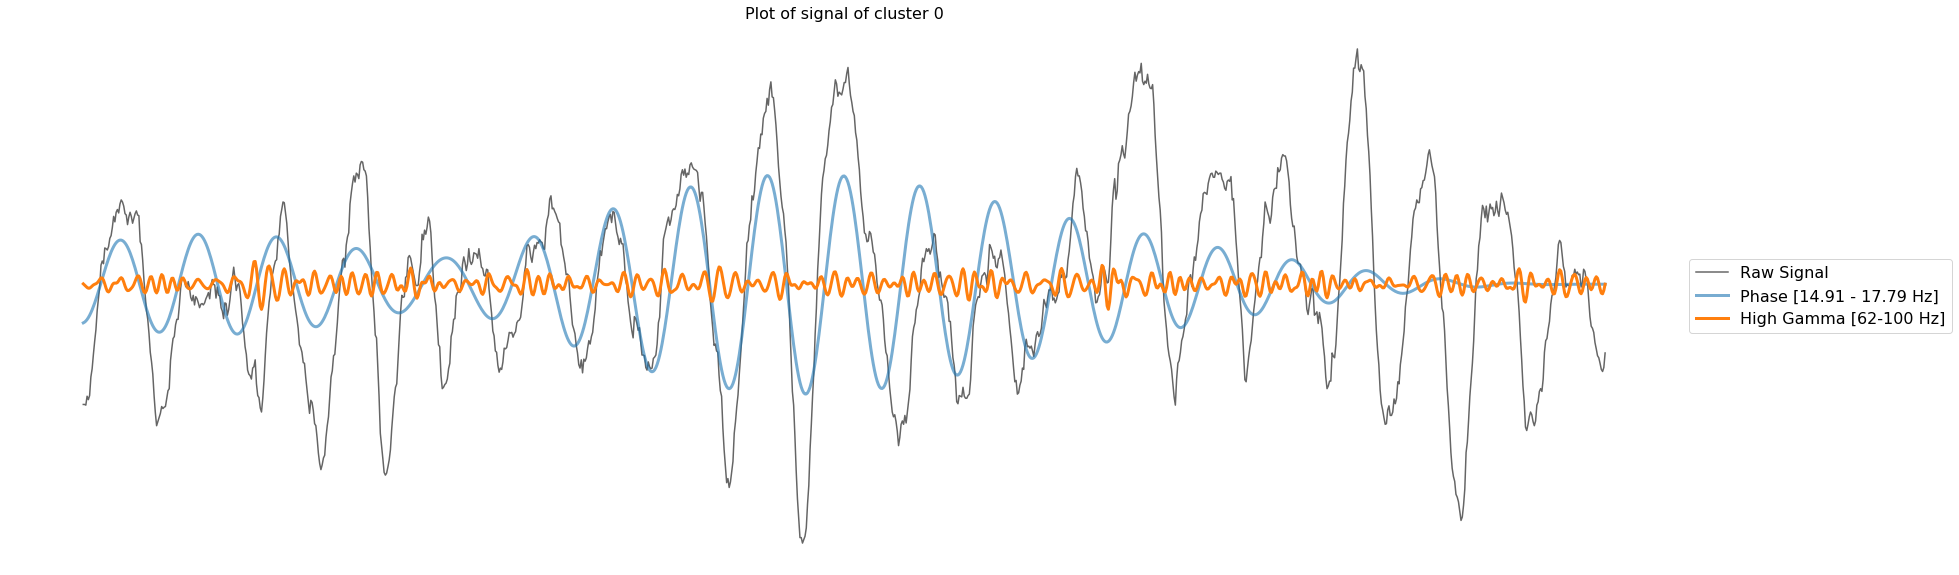

19.040395821053274
4.4007691330277785


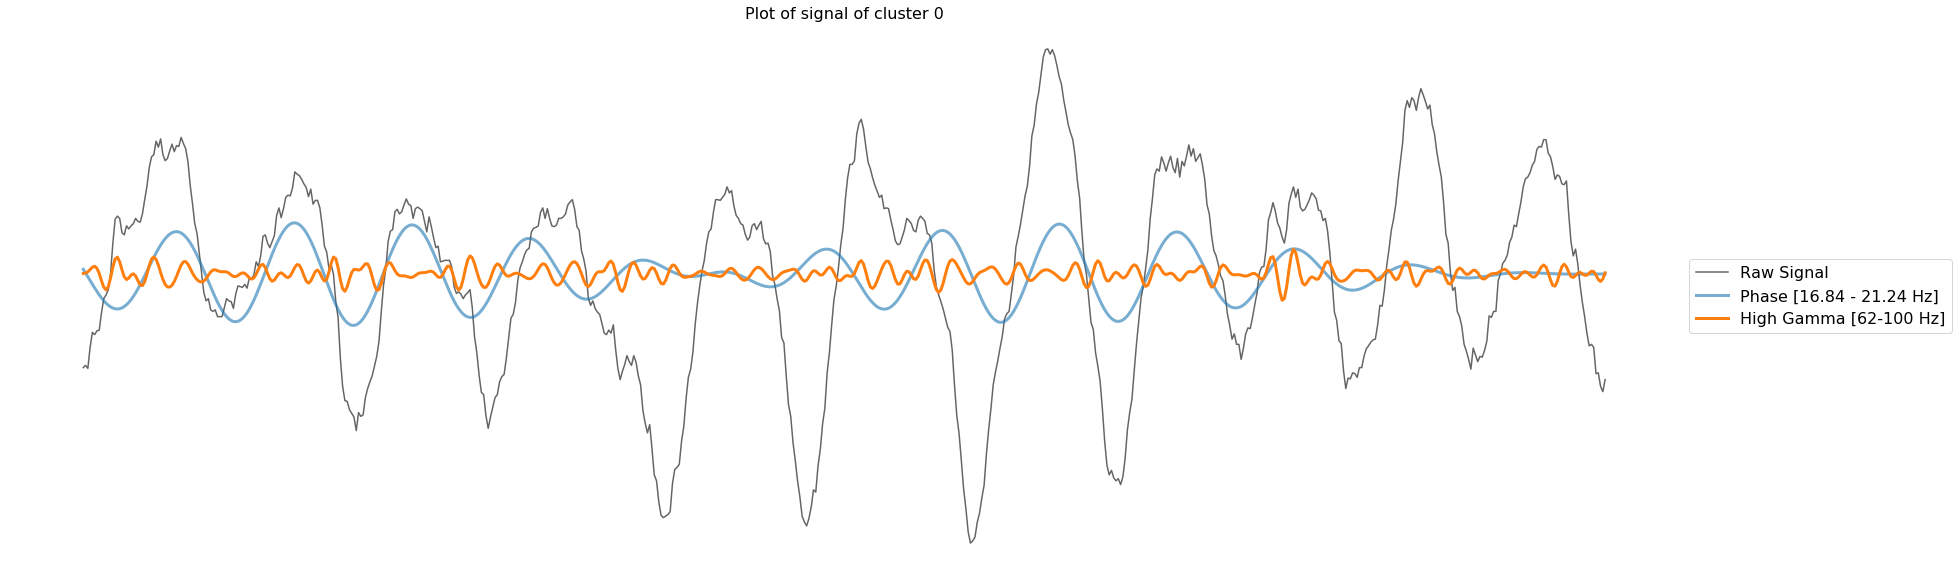

19.975454565037925
4.072580855046727


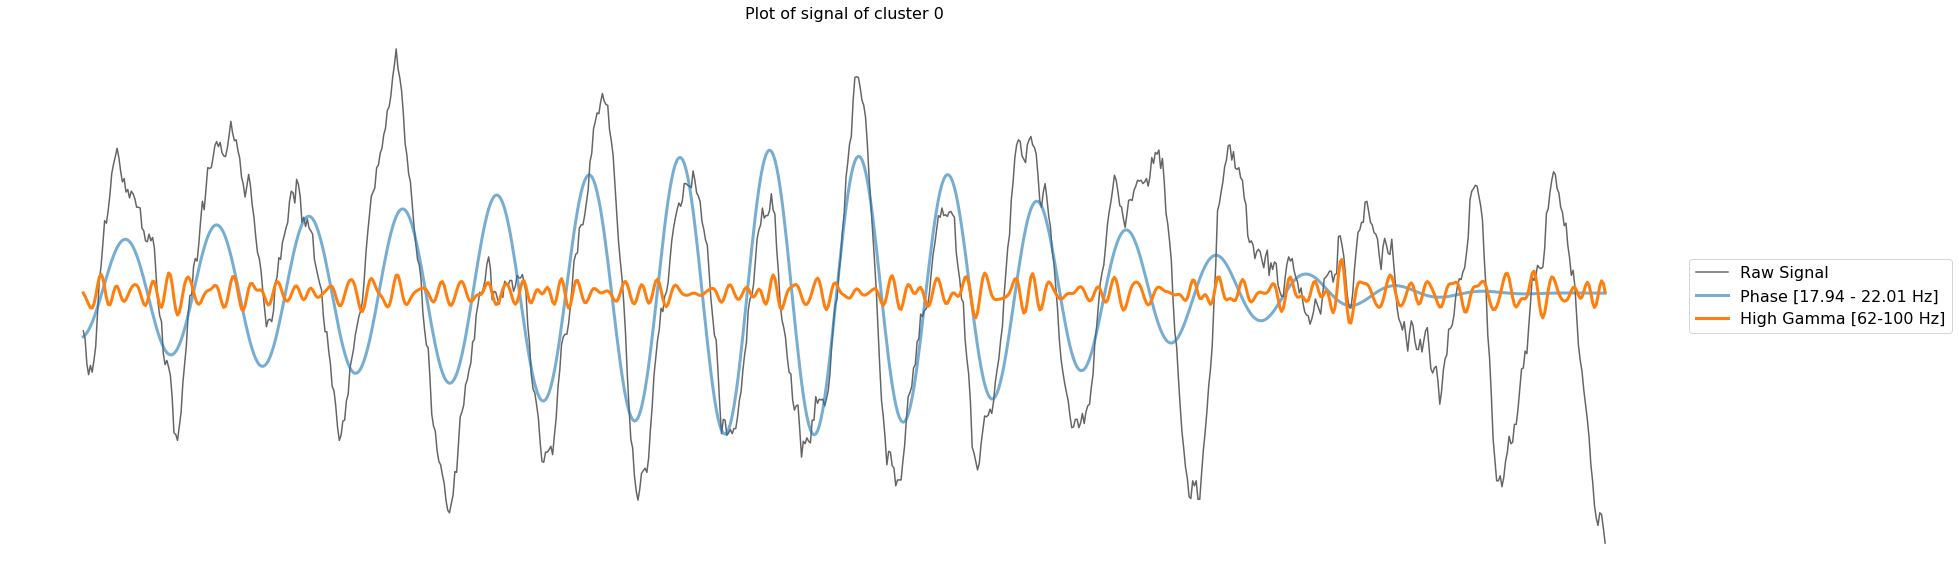

17.75818402129764
2.009866609952865


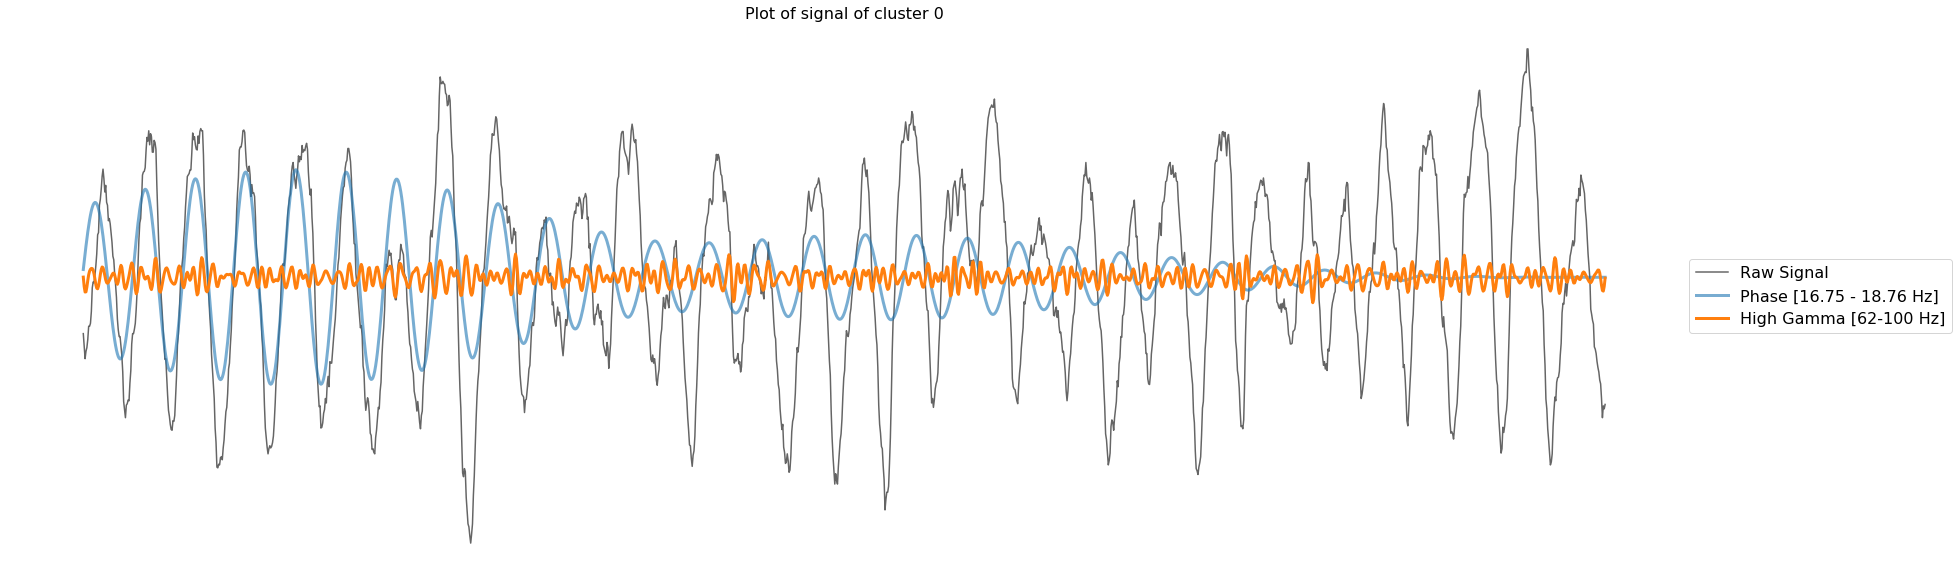

19.748887986758398
3.7985966609320716


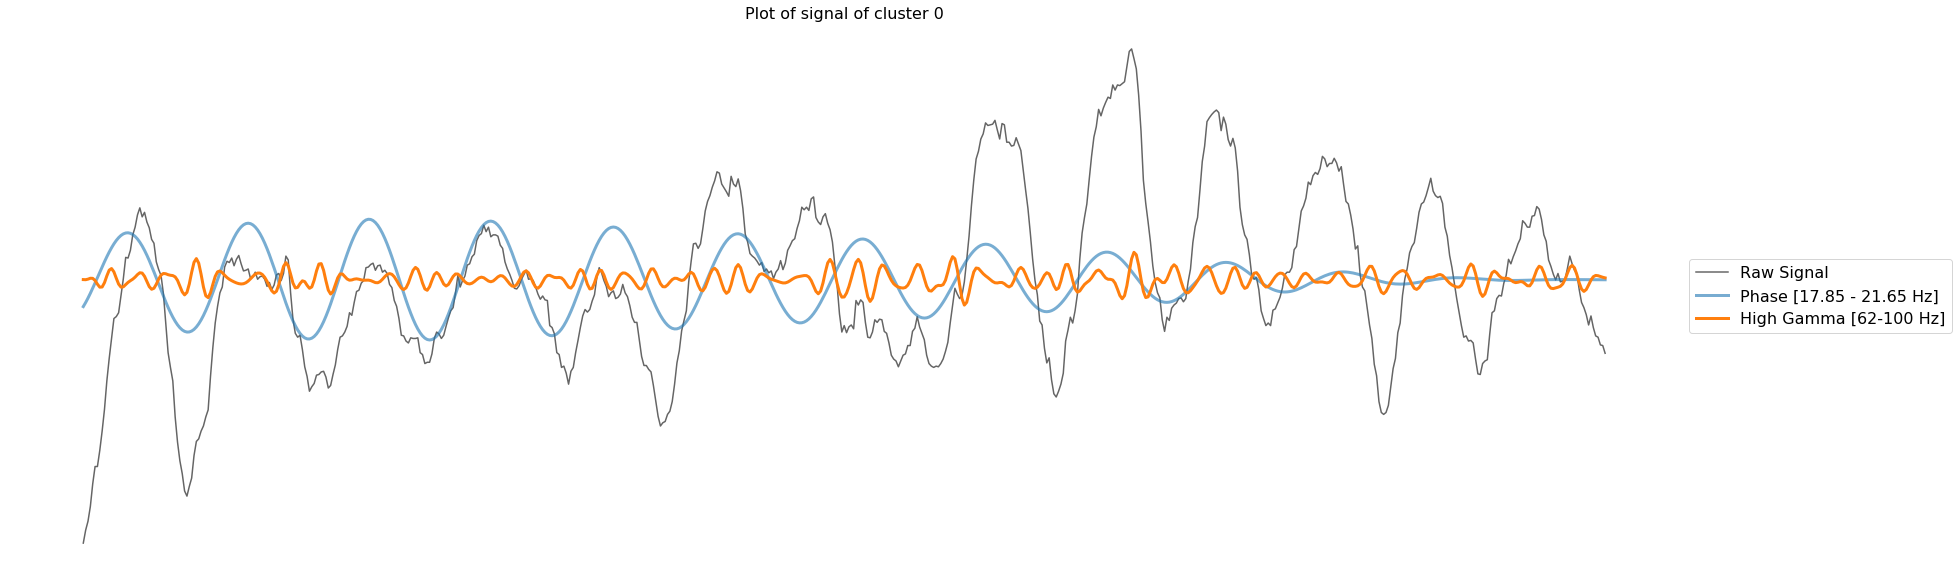

19.261592742193248
2.0000000000000004


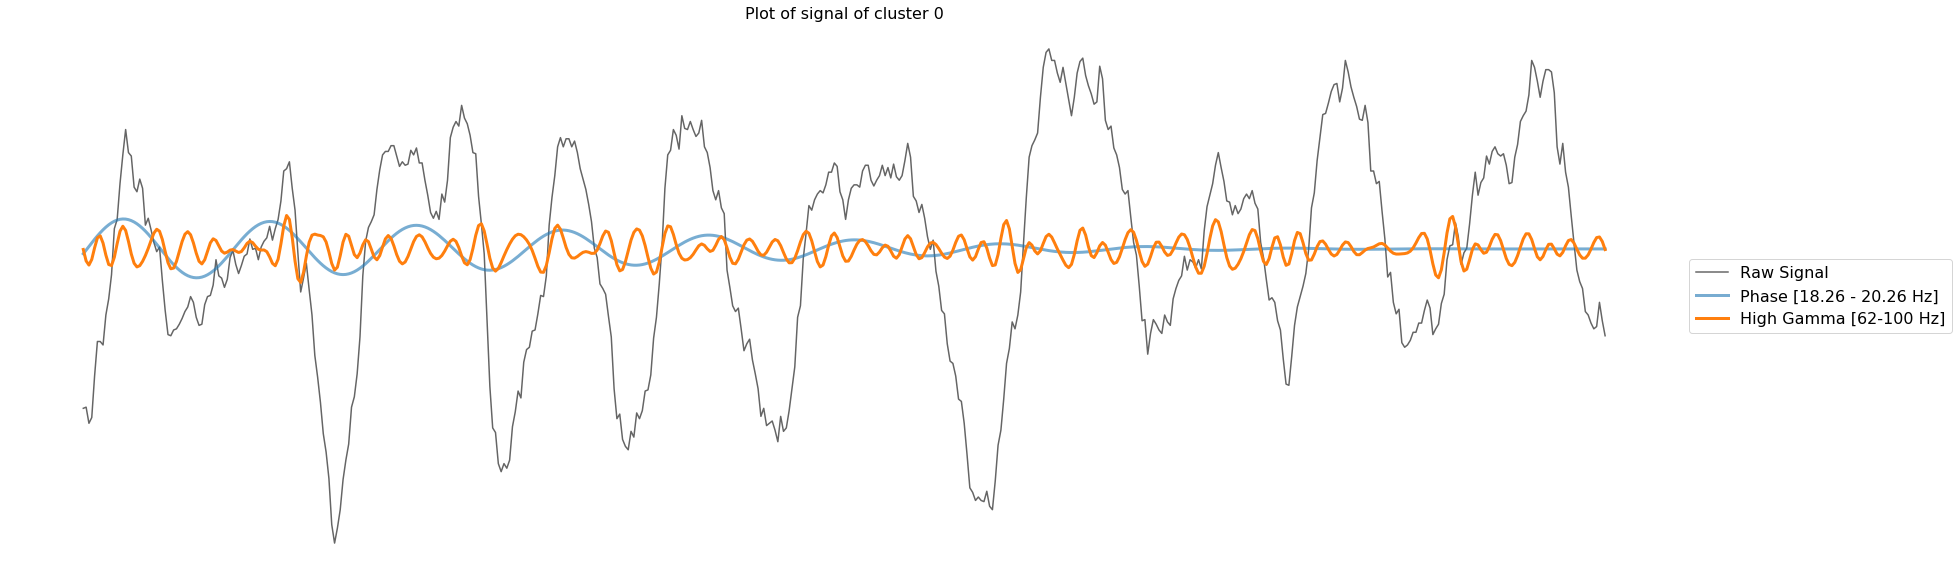

17.243016231781812
2.0000000000000004


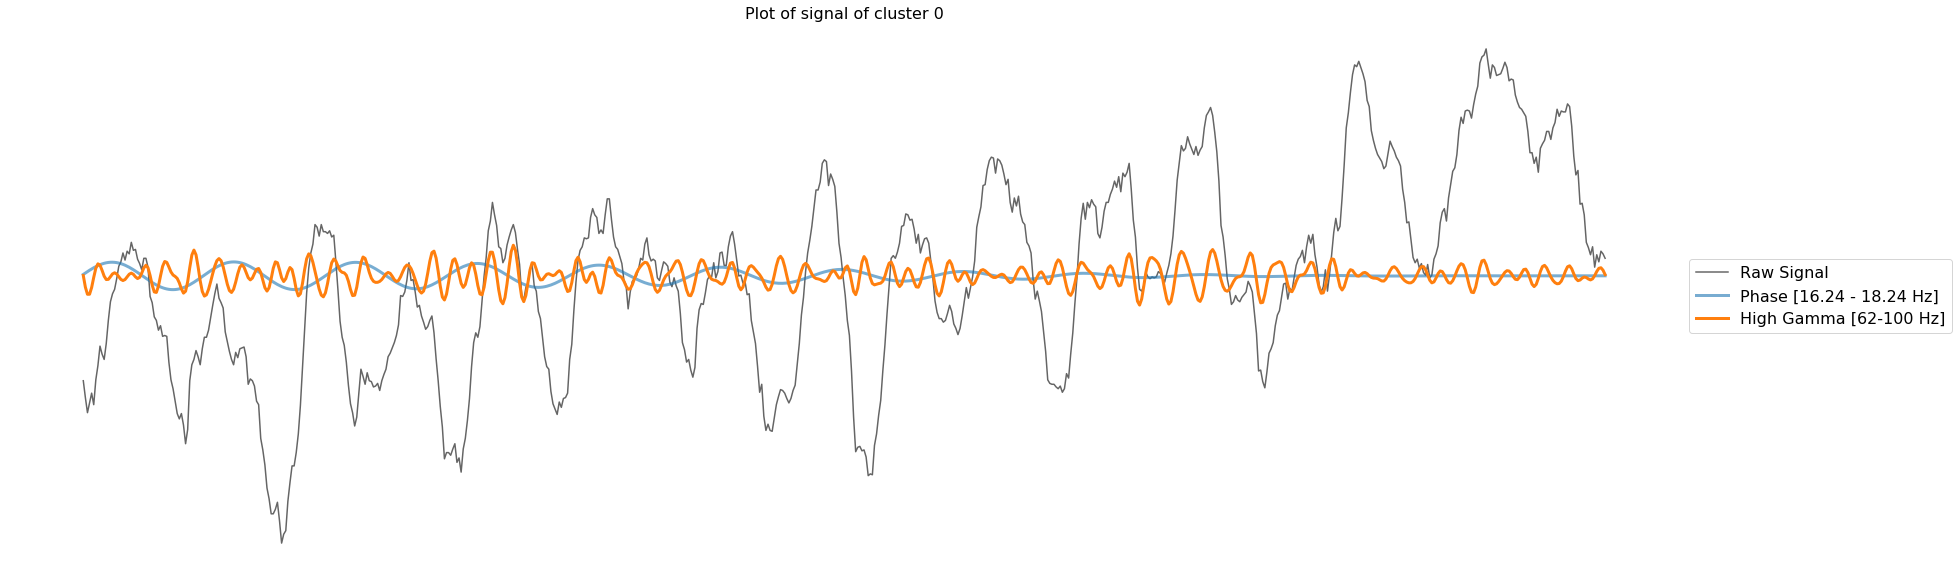

20.767480286667016
2.2878932686811613


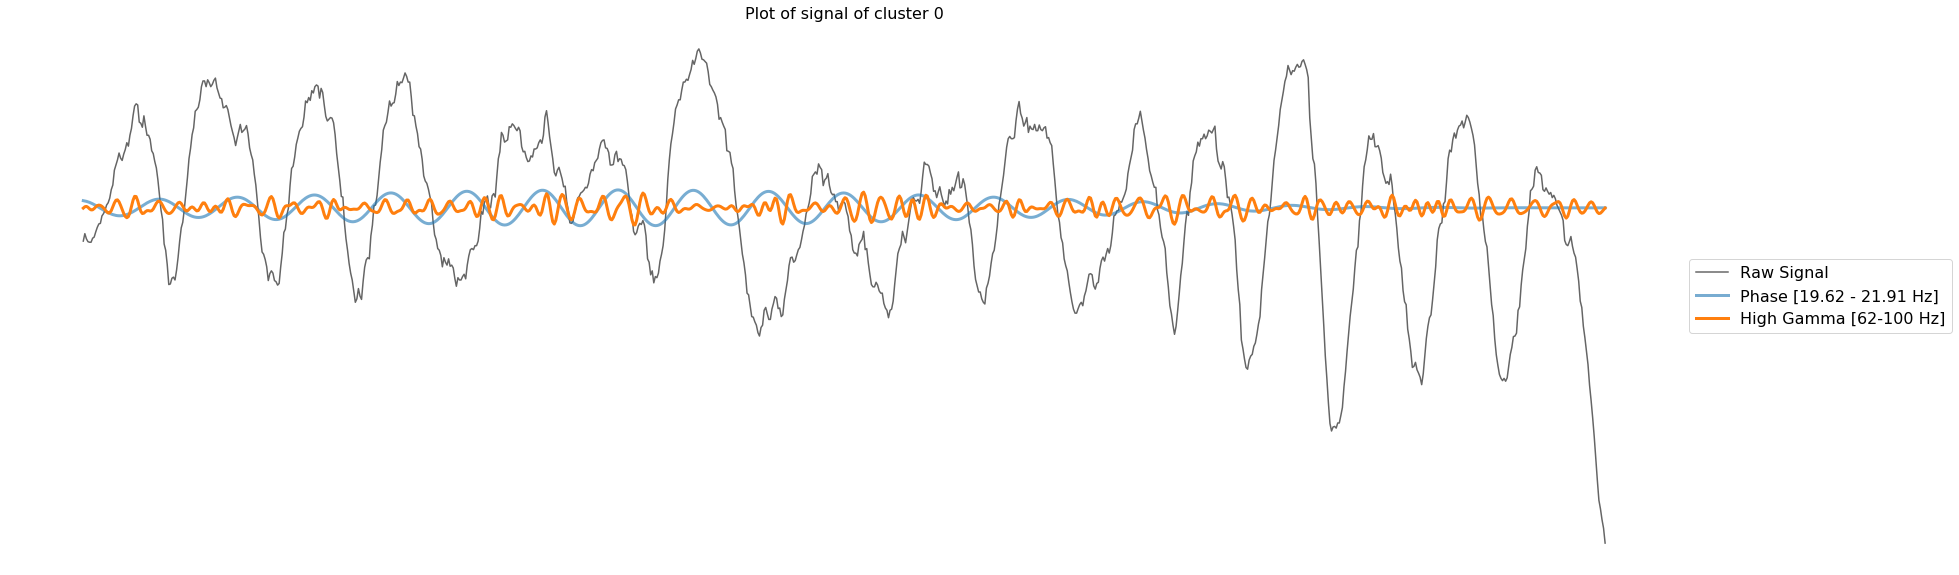

18.00085126419474
2.0000000002714886


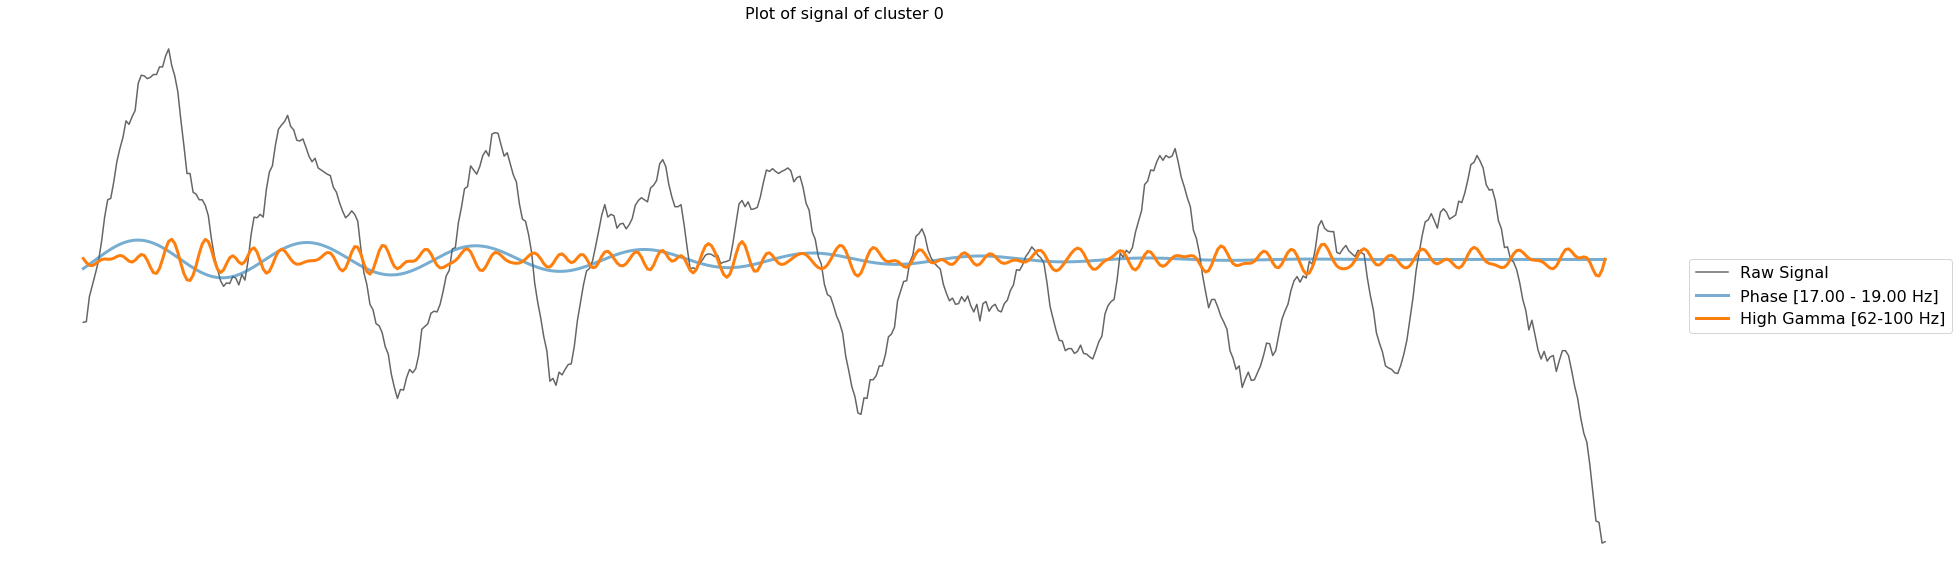

In [11]:
fs = 1000

# set range of the band 
amplitude_providing_band = [62, 150]

for ii in range(0,20):

    # define phase providing band
    CF = features_df['CF'][ii]
    BW = features_df['BW'][ii]

    # making the phase bands 2 bigger on each side works better,
    # so have to check whether FOOOF functions properly
    
    phase_providing_band= [(CF - (BW/2)),  (CF + (BW/2))]
    #phase_providing_band= [(CF - (BW/2))-1,  (CF + (BW/2))+1]
    # phase_providing_band = [1, 30]

    subj = features_df['subj'][ii]
    ch = features_df['ch'][ii]
    ep = features_df['ep'][ii]

    start_sample = int(burst_dataframe['start_sample'][ii])
    end_sample = int(burst_dataframe['end_sample'][ii])

    data = datastruct[subj][ch][ep][start_sample:end_sample]
    
    # use butter bandpass filter to extract this frequency range
    phase_data = pacf.butter_bandpass_filter(data, phase_providing_band[0], phase_providing_band[1], fs);

    # use butter bandpass filter to extract this frequency range
    amp_data = pacf.butter_bandpass_filter(data, amplitude_providing_band[0], amplitude_providing_band[1], fs);


    print(CF)
    print(BW)

    
    
    # plot signal
    plt.figure(figsize=(30,10))
    plt.plot(data - np.mean(data),label= 'Raw Signal', color='black', alpha=.6)
    plt.plot(phase_data,
             label= 'Phase [{0:.2f} - {1:.2f} Hz]'.format(phase_providing_band[0], phase_providing_band[1]),
             linewidth=3, alpha=.6)
    plt.plot(amp_data,label= 'High Gamma [62-100 Hz]',
             linewidth=3)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
    plt.title('Plot of signal of cluster 0', size=16)
    plt.axis('off')
    plt.show()

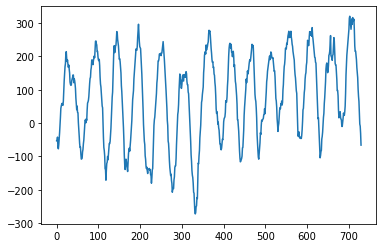